In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import FastICA, NMF, KernelPCA, PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding
import seaborn as sns
import umap

from adjustText import adjust_text
from itertools import combinations

In [3]:
df = pd.read_csv('authors.csv').rename(columns = {'Unnamed: 0': 'Author'})
X = df.copy().drop(['Author','BookID'], axis=1)
authors = df['Author'].values  # n_samples-length array

In [4]:
from sklearn.cluster import SpectralBiclustering, SpectralCoclustering
import matplotlib.pyplot as plt
import numpy as np

# Convert to NumPy
X_chapters = X.to_numpy()
words = X.columns
chapters = df['BookID'].values  # optional, for labeling rows

# --- Spectral Co-Clustering ---
co_model = SpectralCoclustering(n_clusters=4, random_state=0)
co_model.fit(X_chapters)

# --- Spectral Bi-Clustering ---
bi_model = SpectralBiclustering(n_clusters=4, random_state=0)
bi_model.fit(X_chapters)


SpectralBiclustering(n_clusters=4, random_state=0)

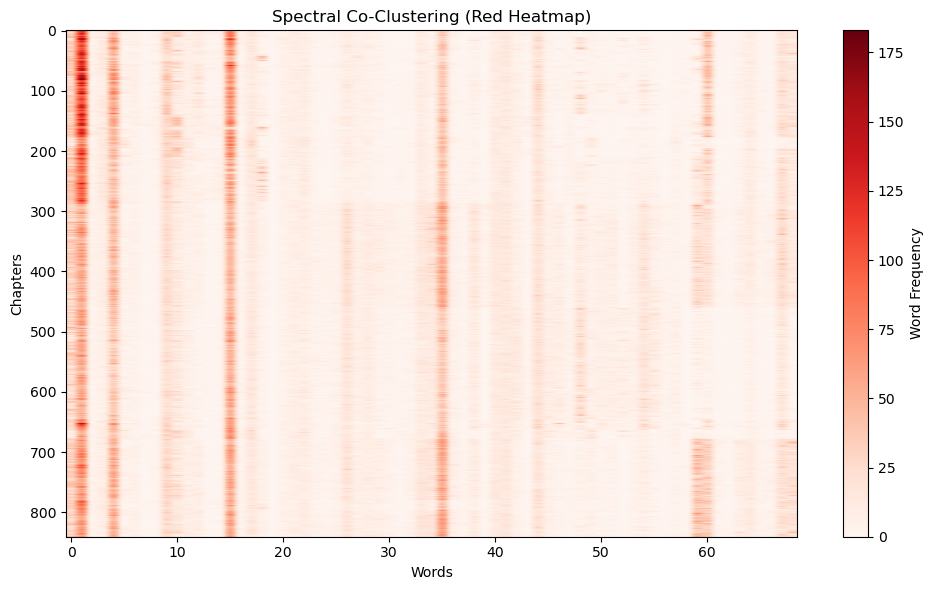

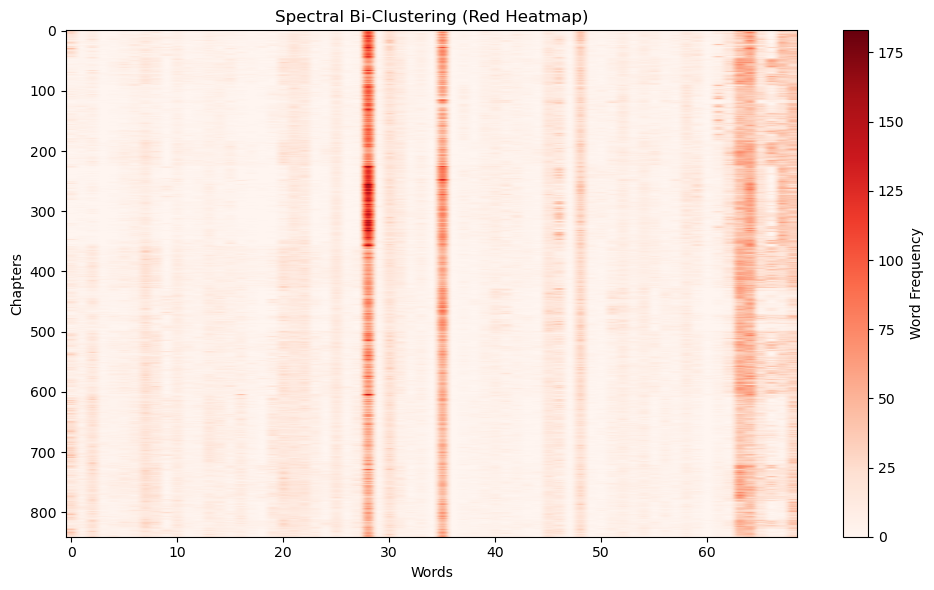

In [6]:
def plot_biclustered_matrix(model, title):
    fit_data = X.iloc[np.argsort(model.row_labels_)]
    fit_data = fit_data.iloc[:, np.argsort(model.column_labels_)]

    plt.figure(figsize=(10, 6))
    plt.imshow(fit_data, aspect='auto', cmap='Reds')  # <- updated colormap here
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Chapters")
    plt.colorbar(label='Word Frequency')
    plt.tight_layout()
    plt.show()

# Re-run with the updated visuals
plot_biclustered_matrix(co_model, "Spectral Co-Clustering (Red Heatmap)")
plot_biclustered_matrix(bi_model, "Spectral Bi-Clustering (Red Heatmap)")
